# 비지도 학습

## 군집 알고리즘

In [6]:
# 사진 >> 숫자 데이터
import numpy as np
import matplotlib.pyplot as plt #사진으로 시각화 하기 위함

In [7]:
fruits = np.load('data/fruits_300.npy')

In [8]:
fruits.shape # 우리가 가지고 있는 배열의 길이, 모양 >> 3차원

(300, 100, 100)

In [11]:
fruits[0, 50] # 0 >> 300개 사진 중 1번째 장/ # 50 >> 첫번째 사진의 50번째 줄

array([  5,   1,   1,   3,   2,  45,  84,  78,  76,  74,  76,  75,  74,
        75,  72,  67,  65,  65,  64,  63,  62,  60,  59,  62,  58,  55,
        54,  54,  53,  52,  50,  49,  51,  52,  53,  53,  54,  56,  59,
        62,  65,  67,  71,  74,  76,  79,  83,  86,  90,  94,  97,  99,
       102, 105, 108, 112, 115, 120, 124, 127, 133, 138, 143, 149, 155,
       156, 157, 162, 170, 174, 175, 176, 181, 187, 194, 201, 204, 206,
       210, 216, 222, 225, 228, 232, 234, 236, 237, 237, 237, 235, 237,
       238, 234, 229, 114,   1,   1,   1,   1,   1], dtype=uint8)

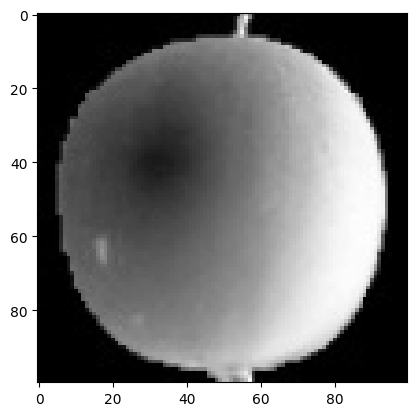

In [17]:
plt.imshow(fruits[0], cmap='gray') # 흑백, #데이터가 있으면 있을수록 밝아짐 >> 보통 의미없는 배경은 낮은 숫자로, 물체는 높은 숫자로 구성되어 있음
plt.show()                         # 관심도가 높은 것 >> 숫자가 높다/ 관심도가 낮은 것 >> 숫자가 낮다
# im >> 이미지를 보여줌

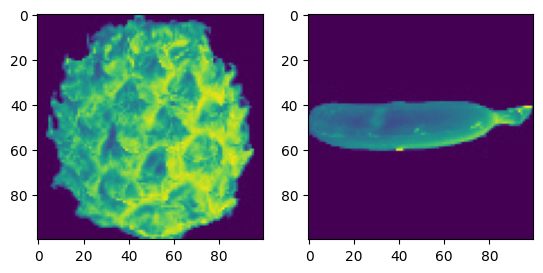

In [19]:
fig, axs = plt.subplots(1, 2) # subplots>> 한 화면에 그래프 2개(1행2열)
axs[0].imshow(fruits[100]) # 111
axs[1].imshow(fruits[200]) # 222
plt.show()

In [27]:
# 사과는 사과끼리, 바나나는 바나나끼리 특성을 분류
# 100x100 이미지를 펼쳐서 길이가 10000인 2차원 배열로 만들기

In [28]:
fruits[0].shape

(100, 100)

In [29]:
apple = fruits[0:100].reshape(-1, 100*100) # 내가 가지고 있는 서진 데이터에
pineapple = fruits[100:200].reshape(-1, 100*100) # -1 >> 남는거 다 넣어(알아서 차원 할당 해줘)
banana = fruits[200:300].reshape(-1, 100*100) # 100*100 >> 가로 세로 한줄로 만들게 10000개(명시)

In [30]:
pineapple.shape

(100, 10000)

In [32]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

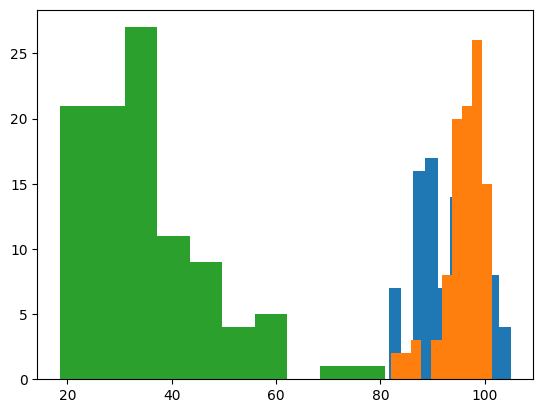

In [39]:
plt.hist(np.mean(apple, axis=1))
plt.hist(np.mean(pineapple, axis=1))
plt.hist(np.mean(banana, axis=1))
plt.show()

# 맷플롯립의 hist() 함수
# >> 축 1
# >> 바나나는 파인애플과 사과와 다른 모습

In [41]:
apple_mean = np.mean(apple, axis=0).reshape(100,100) # >> 0번 축을 기준으로 100*100
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100) # >>reshape는 다시 사진으로 만들기 위함(시각화)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

In [50]:
abs_diff = np.abs(fruits - banana_mean) # fruits -> (300,100,100) - 사과평균 원래내가 가지고 있었던 데이터의 픽셀
print(abs_diff)

[[[0.1  0.07 0.1  ... 0.04 0.01 0.05]
  [0.12 0.03 0.04 ... 0.   0.01 0.  ]
  [0.06 0.02 0.02 ... 0.   0.05 0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.1  0.07 0.1  ... 0.04 0.01 0.05]
  [0.12 0.03 0.04 ... 0.   0.01 0.  ]
  [0.06 0.02 0.02 ... 0.   0.05 0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.1  0.07 0.1  ... 0.04 0.01 0.05]
  [0.12 0.03 0.04 ... 0.   0.01 0.  ]
  [0.06 0.02 0.02 ... 0.   0.05 0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 ...

 [[0.1  0.07 0.1  ... 0.04 0.01 0.05]
  [0.12 0.03 0.04 ... 0.   0.01 0.  ]
  [0.06 0.02 0.02 ... 0.   0.05 0.  ]
  ...
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]
  [0.   0.   0.   ... 0.   0.   0.  ]]

 [[0.1  0.07 0.1  ... 0.04 0.01 0.05]
  [0.12 0.03

In [51]:
abs_mean = np.mean(abs_diff, axis=(1, 2)) # abs >> 음수, 정수가 나오더라도 절댓값을 씌워 똑같은 값으로 활용할 것
                             # >> 가로, 세로의 위치 픽셀

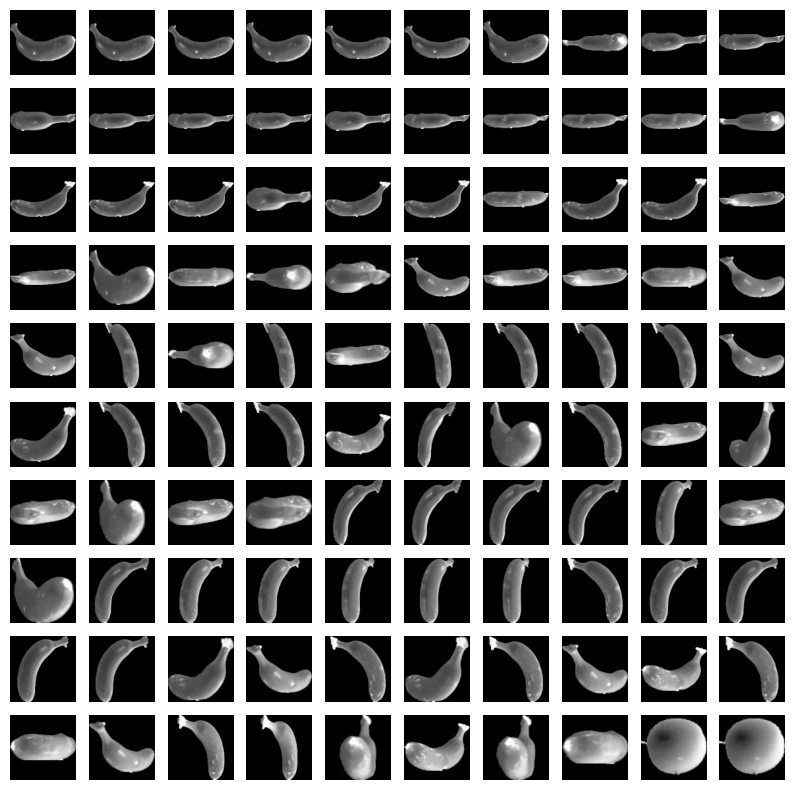

In [52]:
banana_index = np.argsort(abs_mean)[0:100] # >> abs 안에 있는 데이터 오름차순으로 정령
fig, axs = plt.subplots(10, 10, figsize=(10, 10)) # subplots >> 하나의 그림에 그래프 여러개 그릴때 사용
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray')
        axs[i, j].axis('off') # 축 버려주세요
plt.show()

In [53]:
# >> 군집을 이루었다, 클러스팅을 했다 끼리끼리 묶기